## Exploration & Cleaning of North American Letters, Diaries and Oral Histories metadata

In [1]:
#Load libraries
library(tidyverse)
install.packages("arsenal")
library(arsenal)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
help(hist)

In [3]:
#import and view author data
authorData <- read.csv("IMLD_AUTHORS_QA completed.csv")
glimpse(authorData)

Observations: 2,162
Variables: 30
$ sourceids                 <fct> , S10000; S9527, S10001, S10002, S10003, S1…
$ numdocs                   <int> 502, 23, 19, 23, 172, 2, 1, 3, 1, 1, 24, 1,…
$ docauthorid               <fct> per0002637, per0021589, per0022935, per0022…
$ docauthorname             <fct> "Editor", "Pilibosian, Khachadoor, 1904-198…
$ alternatenames            <fct> "", "", "", "", "Giesberg, Henriette Ann El…
$ briefname                 <fct> "Editor", "Khachadoor Pilibosian", "Evelio …
$ authrace                  <fct> Not applicable, White, Black, White, White,…
$ nationality               <fct> Not applicable, Not indicated, United State…
$ religion                  <fct> Not applicable, Catholic; Christian, Cathol…
$ birthyear                 <int> NA, 1904, 1919, 1882, 1813, 1774, 1794, 181…
$ birthmonth                <int> NA, NA, NA, 4, NA, 8, NA, 9, 5, 4, NA, NA, …
$ birthday                  <int> NA, NA, NA, 16, NA, 11, NA, 17, 3, 23, NA, …
$ deathyear       

In [5]:
#import and view document data
docData <- read.csv("IMLD_DOCS_QA completed.csv")
glimpse(docData)

Observations: 8,749
Variables: 71
$ docsequence               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ docid                     <fct> S10000-D001, S10000-D002, S10000-D003, S100…
$ sourceid                  <fct> S10000, S10000, S10000, S10000, S10000, S10…
$ docauthorid               <fct> per0002637, per0021589, per0021589, per0021…
$ doctitle                  <fct> "Front Matter", "Chapter 1. A Necessary Dec…
$ docyear                   <int> 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1…
$ docmonth                  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ docday                    <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ docpage                   <fct> "N pag-vi", "1-4", "5-9", "10-11", "12-14",…
$ doctype                   <fct> Editorial, Chapter, Chapter, Chapter, Chapt…
$ docabbr                   <fct> S10000-D001, S10000-D002, S10000-D003, S100…
$ allsubject                <fct> "", "Cousins; Family separation; Fathers; M…
$ subjname        

In [6]:
#Compare variables in d1 and d2
summary(comparedf(authorData, docData))



Table: Summary of data.frames

version   arg           ncol   nrow
--------  -----------  -----  -----
x         authorData      30   2162
y         docData         71   8749



Table: Summary of overall comparison

statistic                                                      value
------------------------------------------------------------  ------
Number of by-variables                                             0
Number of non-by variables in common                              25
Number of variables compared                                      25
Number of variables in x but not y                                 5
Number of variables in y but not x                                46
Number of variables compared with some values unequal             25
Number of variables compared with all values equal                 0
Number of observations in common                                2162
Number of observations in x but not y                              0
Number of observations 

Given the variables unique to each dataframe, I do not see any reason at this point to combine the DFs. 

In [5]:
#How many series exist in the dataset? Check distribution of authorData$numdocs.
sort(table(authorData$numdocs), decreasing=T)


   1    2    3    4   12    5    6   10    7    8   21   11   18   20   15   26 
1776   77   27   21   19   14   14   11   10   10   10    9    9    9    8    8 
   9   31   14   16   22   23   13   27   40   17   19   24   30   25   28   39 
   7    7    6    6    6    6    5    5    5    4    4    4    4    3    3    3 
  41   32   33   37   43   44   45   48   51   57   64   74  148   34   35   38 
   3    2    2    2    2    2    2    2    2    2    2    2    2    1    1    1 
  42   46   49   52   54   56   59   61   67   69   71   90   93  101  117  149 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 164  167  171  172  190  502 
   1    1    1    1    1    1 

In [6]:
#How to these two datasets cross-reference each other?
subset(authorData, docauthorid == "per0029073")
subset(docData, docauthorid == "per0029073")

,sourceids,numdocs,docauthorid,docauthorname,alternatenames,briefname,authrace,nationality,religion,birthyear,⋯,authorgender,native_occupation,north_american_occupation,organization_affiliations,year_immigration,cultural_heritage,point_of_entry,point_of_emigration,stayed_north_america,author_generation
6,S10003,2,per0029073,"Geisberg, Maximilian Friedrich, 1774-1831",,Maximilian Friedrich Geisberg,White,Germany,Catholic; Christian,1774,⋯,M,Not indicated,Not indicated,,NA,German; European,Not applicable,Not applicable,Not applicable,Not applicable


,docsequence,docid,sourceid,docauthorid,doctitle,docyear,docmonth,docday,docpage,doctype,⋯,point_of_departure,stayed_north_america,author_generation,image_filename,thumbnail_filename,display_thumbnail,wwritten,wsent,marriagestatus,maternalstatus
71,4,S10003-D004,S10003,per0029073,"Letter from Maximilian Friedrich Geisberg, July 02, 1827",1827,7,2,37,Letter,⋯,Not applicable,No,Not applicable,,,,Germany; Western Europe; Europe,Germany; Western Europe; Europe,Widowed,Father
73,6,S10003-D006,S10003,per0029073,"Letter from Maximilian Friedrich Geisberg to Jette Bruns, March 29, 1829",1829,3,29,39-40,Letter,⋯,Not applicable,No,Not applicable,,,,"Oelde, North Rhine-Westphalia, Germany; North Rhine-Westphalia, Germany; Germany; Western Europe; Europe","Munster, Hessen, Germany; Hessen, Germany; Germany; Western Europe; Europe",Widowed,Father


In [7]:
#Who's the outlier (numdocs is 502)?
subset(authorData, numdocs == 502)
subset(docData, docauthorid == "per0002637")

sourceids,numdocs,docauthorid,docauthorname,alternatenames,briefname,authrace,nationality,religion,birthyear,⋯,authorgender,native_occupation,north_american_occupation,organization_affiliations,year_immigration,cultural_heritage,point_of_entry,point_of_emigration,stayed_north_america,author_generation
,502,per0002637,Editor,,Editor,Not applicable,Not applicable,Not applicable,NA,⋯,M,Not indicated,Not indicated,,NA,Not indicated,Not indicated,Not indicated,Not indicated,Not applicable


,docsequence,docid,sourceid,docauthorid,doctitle,docyear,docmonth,docday,docpage,doctype,⋯,point_of_departure,stayed_north_america,author_generation,image_filename,thumbnail_filename,display_thumbnail,wwritten,wsent,marriagestatus,maternalstatus
1,1,S10000-D001,S10000,per0002637,Front Matter,1992,NA,NA,N pag-vi,Editorial,⋯,,No,Not applicable,s10000-i01.jpg,Ts10000-i01.jpg,,Not applicable,Not applicable,Not indicated,Not indicated
24,1,S10001-D001,S10001,per0002637,Front Matter,2000,NA,NA,"N pag, vii-xvi, n pag",Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not indicated,Not indicated
44,1,S10002-D001,S10002,per0002637,Front Matter,1967,NA,NA,N pag-viii,Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not indicated,Not indicated
68,1,S10003-D001,S10003,per0002637,Front Matter,1988,NA,NA,N pag-29,Editorial,⋯,,No,Not applicable,S10003-I01.jpg; S10003-I02.jpg; S10003-I03.jpg; S10003-I04.jpg; S10003-I05.jpg; S10003-I06.jpg; S10003-I07.jpg; S10003-I08.jpg; S10003-I09.jpg; S10003-I10.jpg,TS10003-I01.jpg; TS10003-I02.jpg; TS10003-I03.jpg; TS10003-I04.jpg; TS10003-I05.jpg; TS10003-I06.jpg; TS10003-I07.jpg; TS10003-I08.jpg; TS10003-I09.jpg; TS10003-I10.jpg,,Not applicable,Not applicable,Not indicated,Not indicated
249,1,S10060-D001,S10060,per0002637,Front Matter,1875,NA,NA,N pag-5,Editorial,⋯,,No,Not applicable,S10060-I01.jpg,TS10060-I01.jpg,,Not applicable,Not applicable,Not indicated,Not indicated
275,1,S10061-D001,S10061,per0002637,Front Matter,1819,NA,NA,N pag-xv,Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not indicated,Not indicated
287,1,S10062-D001,S10062,per0002637,Front Matter,1832,NA,NA,N pag-xvi,Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not indicated,Not indicated
340,1,S10189-D001,S10189,per0002637,Front Matter,1945,NA,NA,N pag-n pag,Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not indicated,Not indicated
353,1,S1019-D001,S1019,per0002637,Foreward,1932,NA,NA,n pag-n pag,Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not applicable,Not applicable
412,1,S1023-D001,S1023,per0002637,Introduction,1956,NA,NA,[133],Editorial,⋯,,No,Not applicable,,,,Not applicable,Not applicable,Not applicable,Not applicable


Key variables are docauthorid (authorData) and docid (docData). But note the doctype of the outlier. It is editorial rather than letter. This suggests that series need to be assessed via docData because only there can the doctype of interest (letters) be isolated. 

In [8]:
# With the above in mind, recalcualte the series info. 
letters  <- subset(docData, doctype == "Letter")
nrow(letters)
letters[1,]
sort(table(letters$docauthorid), decreasing=T)
unique(letters$docauthorid)

[1] 1866

,docsequence,docid,sourceid,docauthorid,doctitle,docyear,docmonth,docday,docpage,doctype,⋯,point_of_departure,stayed_north_america,author_generation,image_filename,thumbnail_filename,display_thumbnail,wwritten,wsent,marriagestatus,maternalstatus
70,3,S10003-D003,S10003,per0022938,"Letter from Jette Bruns to Therese Geisberg, June, 1827",1827,6,NA,36-37,Letter,⋯,"Bremen, Bremen, Germany; Bremen, Germany; Germany; Western Europe; Europe",No,First,,,,"Oelde, North Rhine-Westphalia, Germany; North Rhine-Westphalia, Germany; Germany; Western Europe; Europe","Munster, Hessen, Germany; Hessen, Germany; Germany; Western Europe; Europe",Single,Childless



per0038009 per0022938 per0025401 per0004772 per0001043 per0031623 per0025402 
       189        154        148        138         57         57         41 
per0022728 per0027102 per0022575 per0022530 per0005226 per0000624 per0014260 
        37         35         34         26         21         16         13 
per0027000 per0021883 per0026981 per0038008 per0038053 per0038052 per0042353 
        13         12         12         12         10          9          9 
per0021546 per0012949 per0019250 per0026978 per0012953 per0026998 per0038055 
         8          7          7          7          6          6          6 
per0022766 per0025864 per0029196 per0035783 per0000339 per0022894 per0029178 
         5          5          5          5          4          4          4 
per0029184 per0034430 per0035741 per0037456 per0001930 per0004486 per0004491 
         4          4          4          4          3          3          3 
per0004529 per0004552 per0009430 per0022846 per0024805 per00290

[1] per0022938 per0029073 per0029074 per0029076 per0029502 per0029706
  [7] per0001043 per0033444 per0033704 per0033693 per0033698 per0033711
 [13] per0033715 per0033726 per0033727 per0033728 per0033729 per0033737
 [19] per0033750 per0033785 per0033786 per0033787 per0033790 per0033793
 [25] per0033795 per0033801 per0033816 per0033834 per0033901 per0033904
 [31] per0033907 per0033909 per0033911 per0033915 per0033919 per0033920
 [37] per0033925 per0033927 per0033932 per0033936 per0033943 per0033946
 [43] per0033996 per0033999 per0034001 per0034010 per0034015 per0034025
 [49] per0034037 per0034059 per0034064 per0034067 per0034072 per0034084
 [55] per0034087 per0034093 per0034098 per0034153 per0034155 per0034157
 [61] per0034158 per0034163 per0034167 per0034172 per0034180 per0034186
 [67] per0034190 per0034193 per0034195 per0034197 per0034199 per0034203
 [73] per0034206 per0034212 per0034261 per0034262 per0034264 per0034266
 [79] per0034268 per0034269 per0034270 per0034271 per0034272 per0034274
 [85] per0034275 per0034276 per0034277 per0034279 per0034281 per0034283
 [91] per0034286 per0034288 per0034291 per0034294 per0034295 per0034298
 [97] per0034300 per0034301 per0034302 per0034303 per0034309 per0034311
[103] per0034313 per0034315 per0034318 per0034321 per0034322 per0034323
[109] per0034329 per0034330 per0034332 per0034334 per0034335 per0034337
[115] per0034340 per0034345 per0034346 per0034349 per0034350 per0034353
[121] per0034354 per0034355 per0034440 per0034442 per0034446 per0034448
[127] per0034449 per0034452 per0034454 per0034455 per0034456 per0034457
[133] per0034459 per0034460 per0034463 per0034464 per0034465 per0034467
[139] per0034468 per0034498 per0034499 per0034500 per0034501 per0034503
[145] per0034504 per0034505 per0034506 per0034510 per0034511 per0034513
[151] per0034514 per0034515 per0034517 per0034518 per0034519 per0034523
[157] per0034524 per0034527 per0034528 per0034529 per0034530 per0034531
[163] per0034532 per0034544 per0034545 per0034546 per0034547 per0034550
[169] per0034551 per0034554 per0034555 per0034557 per0034558 per0034559
[175] per0034560 per0034561 per0034563 per0034562 per0034564 per0034565
[181] per0034566 per0034567 per0034568 per0034569 per0034570 per0034571
[187] per0034572 per0034590 per0034592 per0034593 per0034594 per0034595
[193] per0034597 per0034599 per0034600 per0034603 per0034604 per0034606
[199] per0034607 per0034608 per0034609 per0034613 per0034615 per0034627
[205] per0034628 per0034629 per0034630 per0034631 per0034632 per0034633
[211] per0034634 per0034638 per0034639 per0034640 per0034641 per0034642
[217] per0034643 per0034644 per0034645 per0034647 per0034648 per0034649
[223] per0034650 per0034651 per0034652 per0025401 per0025402 per0042353
[229] per0027102 per0042384 per0042385 per0042387 per0042388 per0042391
[235] per0042440 per0042441 per0042442 per0042444 per0042446 per0042453
[241] per0042454 per0042506 per0030992 per0031623 per0004772 per0009430
[247] per0001930 per0031173 per0031175 per0022846 per0031176 per0041383
[253] per0031178 per0031180 per0031181 per0031182 per0004486 per0032004
[259] per0041388 per0031188 per0031190 per0041394 per0004511 per0031224
[265] per0032006 per0031227 per0032007 per0031228 per0035346 per0031251
[271] per0031257 per0031259 per0031261 per0031263 per0032144 per0031265
[277] per0032145 per0031268 per0031334 per0031335 per0035343 per0031337
[283] per0031338 per0031341 per0031342 per0031343 per0032146 per0031344
[289] per0031345 per0031346 per0031347 per0035344 per0032147 per0032148
[295] per0032157 per0031585 per0031586 per0035349 per0035350 per0031599
[301] per0031601 per0031602 per0004487 per0004488 per0032158 per0041985
[307] per0004489 per0032161 per0032163 per0004490 per0033380 per0033381
[313] per0004491 per0004492 per0004493 per0004494 per0033390 per0004495
[319] per0004496 per0031823 per0031824 per0035351 per0031827 per0033394
[325] per0031828 per0031829 per0033407 per0004498 per0004499 per0004500
[331] per0004502 per0004503 per0004506 per

In [136]:
# With the above in mind, recalcualte the series info. First off, how many letters?
filter(docData, doctype == "Letter" & language == "English" & docyear < 1955)  %>% 
count()

n
1391


In [137]:
# Then how many letters per author
filter(docData, doctype == "Letter" & language == "English" & docyear < 1955)%>% 
count(docauthorid, sort = TRUE)

docauthorid,n
per0038009,189
per0025401,148
per0004772,137
per0001043,57
per0031623,55
per0025402,41
per0022530,26
per0000624,16
per0014260,13
per0027000,13


In [138]:
# And how many 1-letter series?
filter(docData, doctype == "Letter" & language == "English" & docyear < 1955)  %>% 
count(docauthorid, sort = TRUE)  %>% 
count(n == 1)

n == 1,nn
FALSE,85
TRUE,437


There are two series of more than 100 English language letters, two series of 50 to 99 letters and eight series of 10 to 49 letters. The rest are series of fewer than 10, with 396 single-letter series. 

In [139]:
summary(subset(docData, doctype == "Letter" & language == "English" & docyear < 1955))

  docsequence            docid         sourceid       docauthorid 
 Min.   :  1.00   S1019-D002:   1   S6210  :231   per0038009:189  
 1st Qu.: 25.00   S1019-D003:   1   S316   :194   per0025401:148  
 Median : 57.00   S1019-D004:   1   S11073 :189   per0004772:137  
 Mean   : 73.82   S1019-D005:   1   S2344  :140   per0001043: 57  
 3rd Qu.:113.00   S1019-D006:   1   S9983  :117   per0031623: 55  
 Max.   :239.00   S1019-D007:   1   S11067 : 97   per0025402: 41  
                  (Other)   :1385   (Other):423   (Other)   :764  
                                                               doctitle   
 Letter from William Bell, 1823?                                   :  17  
 Letter from William Bell, 1817?                                   :   9  
 Letter from William Sampson, 1807                                 :   9  
 Letter from Harvey J. Philpot, 1871                               :   4  
 Letter from Critchlow Harris to Sarah Stretch Harris, August, 1854:   3  
 Letter from M

To do: Examine levels and missing data on all variables. Convert blanks to NAs. Create a new folder containing only the docs to include in the analysis. Remove HTML from those. 

In [140]:
englishLetters <- filter(docData, doctype == "Letter" & language == "English" & docyear < 1955)

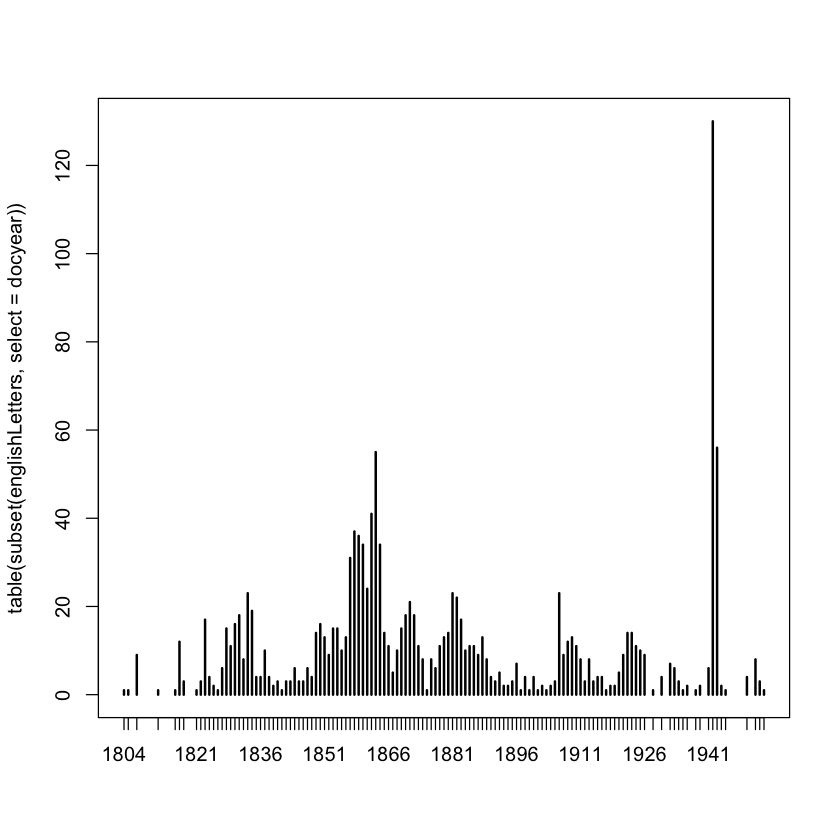

In [141]:
plot(table(subset(englishLetters, select = docyear)))

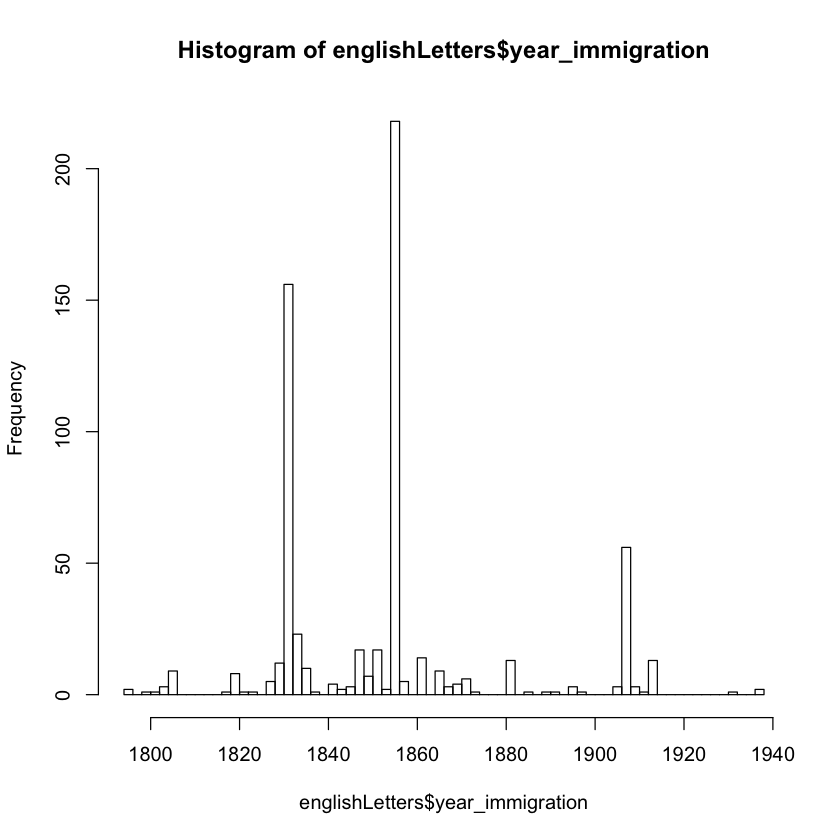

In [132]:
hist(englishLetters$year_immigration, breaks = 100)

In [104]:
sort(table(droplevels(englishLetters$cultural_heritage)), decreasing = TRUE)sort(table(droplevels(englishLetters$cultural_heritage)), decreasing = TRUE)sort(table(droplevels(englishLetters$cultural_heritage)), decreasing = TRUE)


           English; European              Welsh; European 
                         417                          194 
             Japanese; Asian                       Jewish 
                         189                          175 
         Norwegian; European            Italian; European 
                         120                          114 
          Scottish; European              Irish; European 
                          75                           65 
             Dutch; European    Irish; European; Scottish 
                          60                           19 
                                          Czech; European 
                          17                           17 
           Russian; European    Jewish; Russian; European 
                          16                           14 
  French; European; Prussian            Finnish; European 
                          13                           12 
            German; European             Polish; Europe

In [ ]:
sort(table(droplevels(englishLetters$cultural_heritage)), decreasing = TRUE)

In [62]:
englishLetters$birthplace[englishLetters$birthplace=="Not indicated"] <- NA

In [70]:
summary(droplevels(englishLetters$birthplace))

Aberdare, Wales; Wales; United Kingdom; Western Europe; Europe 
                                                                                                                    6 
                                                 Aberdeen, Scotland; Scotland; United Kingdom; Western Europe; Europe 
                                                                                                                    1 
                                                      Aust-Agder, Norway; Norway; Scandinavia; Western Europe; Europe 
                                                                                                                    1 
                Beitstad, Nord-Trondelag, Norway; Nord-Trondelag, Norway; Norway; Scandinavia; Western Europe; Europe 
                                                                                                                    1 
                                                         Bialystok Voivodship, Poland; Poland; Eastern Europe; Europe 
                                                                                                                    1 
                                                   Bicester, England; England; United Kingdom; Western Europe; Europe 
                                                                                                                    5 
                                               Cicagna, Liguria, Italy; Liguria, Italy; Italy; Western Europe; Europe 
                                                                                                                   57 
                                                                               Congo Republic; Central Africa; Africa 
                                                                                                                    1 
                                                                               Czech Republic; Eastern Europe; Europe 
                                                                                                                   17 
                                                                         Denmark; Scandinavia; Western Europe; Europe 
                                                                                                                    1 
                                        Dublin, Leinster, Ireland; Leinster, Ireland; Ireland; Western Europe; Europe 
                                                                                                                    4 
                                Dundonald, Northern Ireland; Northern Ireland; United Kingdom; Western Europe; Europe 
                                                                                                                   13 
                                                Edinburgh, Scotland; Scotland; United Kingdom; Western Europe; Europe 
                                                                                                                    1 
                                                                      England; United Kingdom; Western Europe; Europe 
                                                                                                                  361 
                                                                         Finland; Scandinavia; Western Europe; Europe 
                                                                                                                   12 
                              Finnoy, Rogaland, Norway; Rogaland, Norway; Norway; Scandinavia; Western Europe; Europe 
                                                                                                                    1 
                           Fredrikstad, Ostfold, Norway; Ostfold, Norway; Norway; Scandinavia; Western Europe; Europe 
                                                                                                                    1 
         

In [71]:
englishLetters$deathplace[englishLetters$deathplace=="Not indicated"] <- NA

In [72]:
summary(droplevels(englishLetters$deathplace))

Barre, MA; Massachusetts; United States; New England; Northeast States; East Coast States; North America 
                                                                                                                        1 
                                                                                                    Canada; North America 
                                                                                                                       12 
           Cannes, Provence-Alpes-Côte d'Azur, France; Provence-Alpes-Côte d'Azur, France; France; Western Europe; Europe 
                                                                                                                        1 
  Cincinnati, OH; Ohio; United States; East North Central States; Midwest States; Mississippi Basin States; North America 
                                                                                                                       57 
College Hill, OH; Ohio; United States; East North Central States; Midwest States; Mississippi Basin States; North America 
                                                                                                                        1 
   Eau Claire, WI; Wisconsin; United States; East North Central States; Midwest States; Great Lakes States; North America 
                                                                                                                        1 
                                                                          England; United Kingdom; Western Europe; Europe 
                                                                                                                        3 
 Glencoe, IL; Illinois; United States; East North Central States; Midwest States; Mississippi Basin States; North America 
                                                                                                                        1 
                                                          Goderich, ON; Ontario; Canada; Central Provinces; North America 
                                                                                                                        6 
              Illinois; United States; East North Central States; Midwest States; Mississippi Basin States; North America 
                                                                                                                        1 
                                                                                          Ireland; Western Europe; Europe 
                                                                                                                       13 
                                                         London, England; England; United Kingdom; Western Europe; Europe 
                                                                                                                        1 
                                                            London, ON; Ontario; Canada; Central Provinces; North America 
                                                                                                                        7 
                             Los Angeles, CA; California; United States; Western States; West Coast States; North America 
                                                                                                                       13 
                    Michigan; United States; East North Central States; Midwest States; Great Lakes States; North America 
                                                                                                                       12 
                  Minnesota; United States; West North Central States; Midwest States; Great Plains States; North America 
                                                                                                                        1 
                                                                              Nor

In [73]:
summary(englishLetters$native_occupation)

1019 
                                          Businessman; Educator 
                                                            189 
                                                        Teacher 
                                                            158 
                                                         Farmer 
                                                             41 
                                  Businessman; Farmer; Merchant 
                                                             38 
                                                         Clergy 
                                                             36 
                                                       Engineer 
                                                             13 
                                              Farmer; Tradesman 
                                                             12 
                                                      Tradesman 
                                                             11 
                                                        Student 
                                                              6 
                                                         Writer 
                                                              4 
                                                 Clergy; Farmer 
                                                              3 
                                             Homemaker; Student 
                                                              3 
                                             Political activist 
                                                              3 
                                             Businessman's wife 
                                                              2 
                                                        Butcher 
                                                              2 
                                                 Factory worker 
                                                              2 
                                         Businessman; Tradesman 
                                                              1 
                                                        Jeweler 
                                                              1 
                                                        Laborer 
                                                              1 
                                             Laborer; Tradesman 
                                                              1 
                                                   Manufacturer 
                                                              1 
                                                       Merchant 
                                                              1 
                                             Military personnel 
                                                              1 
                                                          Miner 
                                                              1 
                                               Physician; Slave 
                                                              1 
                      Political activist; Real estate developer 
                                                              1 
                                                     Seamstress 
                                                              1 
                                                Social reformer 
                                                              1 
                                       Teacher; Writer; Laborer 
                                                              1 
                                                  Urban planner 
                                                              1 
                                                     Accountant 
                             

In [84]:
englishLetters$native_occupation[englishLetters$native_occupation==""] <- NA

In [85]:
summary(englishLetters$native_occupation)

Businessman; Educator 
                                                            189 
                                                        Teacher 
                                                            158 
                                                         Farmer 
                                                             41 
                                  Businessman; Farmer; Merchant 
                                                             38 
                                                         Clergy 
                                                             36 
                                                       Engineer 
                                                             13 
                                              Farmer; Tradesman 
                                                             12 
                                                      Tradesman 
                                                             11 
                                                        Student 
                                                              6 
                                                         Writer 
                                                              4 
                                                 Clergy; Farmer 
                                                              3 
                                             Homemaker; Student 
                                                              3 
                                             Political activist 
                                                              3 
                                             Businessman's wife 
                                                              2 
                                                        Butcher 
                                                              2 
                                                 Factory worker 
                                                              2 
                                         Businessman; Tradesman 
                                                              1 
                                                        Jeweler 
                                                              1 
                                                        Laborer 
                                                              1 
                                             Laborer; Tradesman 
                                                              1 
                                                   Manufacturer 
                                                              1 
                                                       Merchant 
                                                              1 
                                             Military personnel 
                                                              1 
                                                          Miner 
                                                              1 
                                               Physician; Slave 
                                                              1 
                      Political activist; Real estate developer 
                                                              1 
                                                     Seamstress 
                                                              1 
                                                Social reformer 
                                                              1 
                                       Teacher; Writer; Laborer 
                                                              1 
                                                  Urban planner 
                                                              1 
                                                                
                                                              0 
            

In [22]:
summary(docData$doctype)

Cartoon          Chapter            Diary        Editorial 
             469             3367              750              499 
Emigration guide     Illustration        Interview           Letter 
             705               12                1             1866 
          Memoir     Oral history             Poem          Section 
               2             1028               36               14

In [20]:
oralHistory <- subset(docData, doctype == "Oral history" & language == "English")

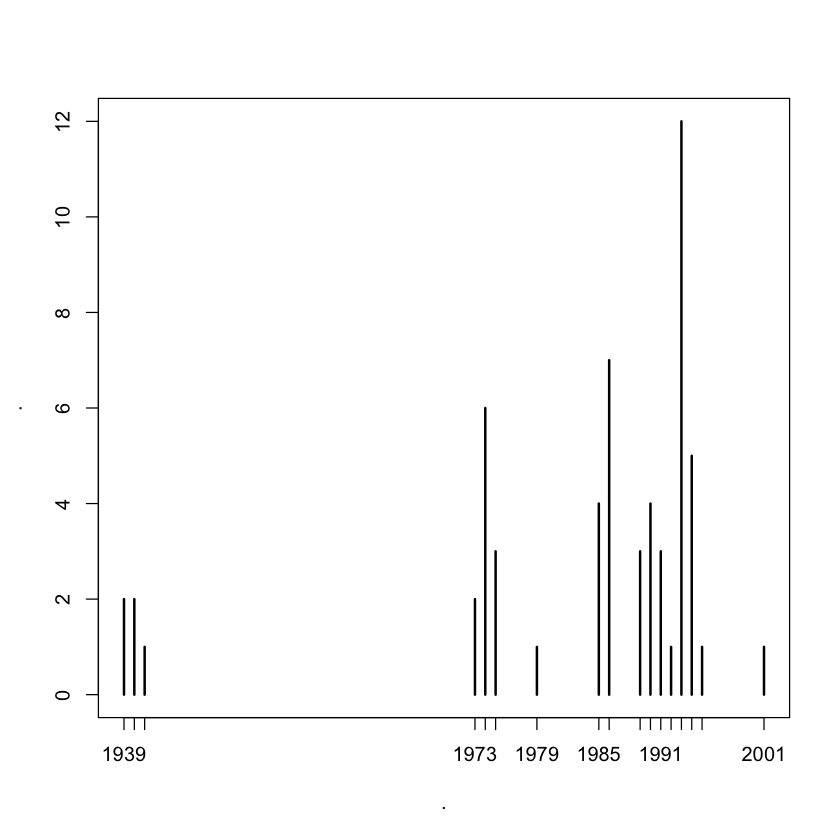

In [34]:
filter(docData, doctype == "Oral history" & language == "English" & authrace != "White")  %>% select(docyear) %>% table() %>% plot()

In [ ]:
filter(docData, doctype == "Oral history" & language == "English" & authrace != "White")  %>% select(docyear) %>% table() %>% plot()

In [21]:
summary(oralHistory)

  docsequence              docid        sourceid       docauthorid 
 Min.   :  1.000   S10330-D001:  1   S11413 : 90   per0002637:  3  
 1st Qu.:  1.000   S10331-D001:  1   S10330 :  1   per0025875:  2  
 Median :  1.000   S10332-D001:  1   S10331 :  1   per0027871:  2  
 Mean   :  5.719   S10333-D001:  1   S10332 :  1   per0033747:  2  
 3rd Qu.:  1.000   S10334-D001:  1   S10333 :  1   per0034008:  2  
 Max.   :101.000   S10335-D001:  1   S10334 :  1   per0035102:  2  
                   (Other)    :940   (Other):851   (Other)   :933  
                               doctitle      docyear        docmonth     
 A Boilermaker                     :  1   Min.   :1939   Min.   : 1.000  
 A Down Neck Irishman              :  1   1st Qu.:1985   1st Qu.: 4.000  
 A Hollander's Mainstay            :  1   Median :1991   Median : 6.000  
 A Lone Wolf                       :  1   Mean   :1985   Mean   : 6.356  
 A Mistake to Go to Another Country:  1   3rd Qu.:1993   3rd Qu.: 9.000  
 A Model Fam

In [35]:
filter(docData, language == "English" & authrace != "White") %>% summary()

  docsequence             docid         sourceid        docauthorid 
 Min.   :  0.00   S10000-D001:   1   S11073 : 197   per0002637:402  
 1st Qu.:  1.00   S10001-D001:   1   S9366  :  62   per0025401:148  
 Median :  9.00   S10001-D002:   1   S11074 :  59   per0021713:117  
 Mean   : 25.04   S10001-D003:   1   S9515  :  50   per0018876: 61  
 3rd Qu.: 27.00   S10001-D004:   1   S10310 :  45   per0007305: 59  
 Max.   :241.00   S10001-D005:   1   S9516  :  38   per0021505: 48  
                  (Other)    :1603   (Other):1158   (Other)   :774  
         doctitle       docyear        docmonth          docday     
 Front Matter: 214   Min.   :1796   Min.   : 1.000   Min.   : 1.00  
 Back Matter :  46   1st Qu.:1909   1st Qu.: 4.000   1st Qu.: 9.00  
 Chapter 1   :   9   Median :1946   Median : 7.000   Median :17.00  
 Chapter 3   :   9   Mean   :1944   Mean   : 6.521   Mean   :16.34  
 Chapter 4   :   9   3rd Qu.:1988   3rd Qu.:10.000   3rd Qu.:23.00  
 Chapter 5   :   9   Max.   :2002 

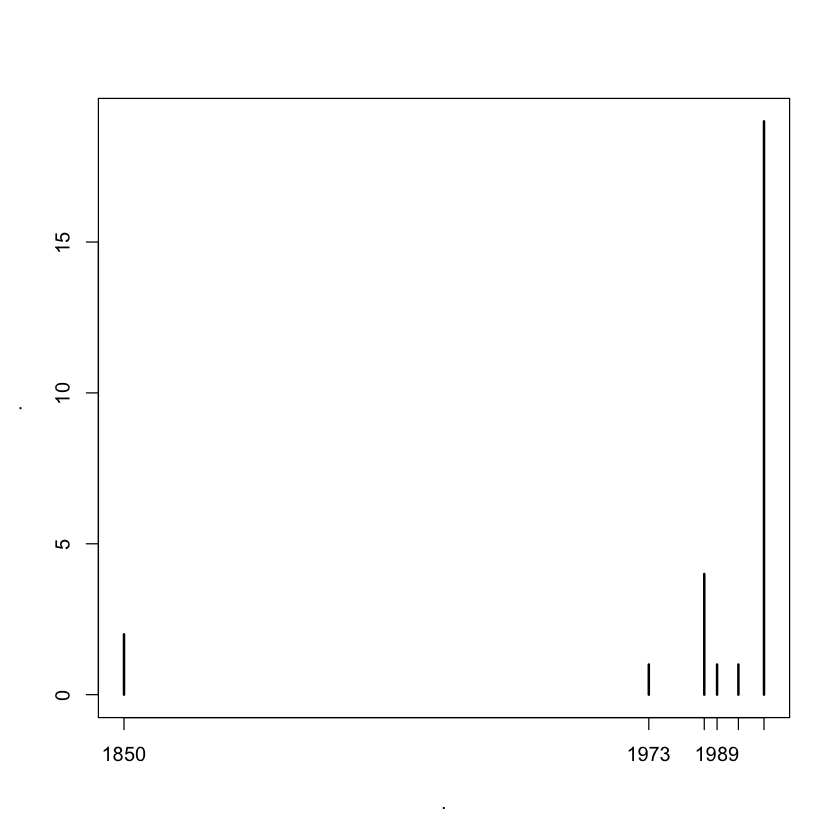

In [38]:
filter(docData, language == "English" & authrace == "Black") %>%  select(docyear) %>% table() %>% plot()

In [51]:
filter(docData, language == "English" & authrace == "Black" & docyear == "1850")

docsequence,docid,sourceid,docauthorid,doctitle,docyear,docmonth,docday,docpage,doctype,⋯,point_of_departure,stayed_north_america,author_generation,image_filename,thumbnail_filename,display_thumbnail,wwritten,wsent,marriagestatus,maternalstatus
9,S9831-D009,S9831,per0035748,"Letter from G. Heerspink, 1850",1850,NA,NA,21,Letter,⋯,,No,First,,,,United States; North America,Europe,Not indicated,Not indicated
69,S9831-D069,S9831,per0035748,"Letter from G. Heerspink, 1850",1850,NA,NA,110,Letter,⋯,,No,First,,,,Not indicated,Netherlands; Western Europe; Europe,Not indicated,Not indicated


In [49]:
filter(docData, language == "English" & authrace != "White") %>% select(nationality) %>% table()

.
           American          Australian            Canadian             Chilean 
                626                   0                   0                   0 
     Chinese; Asian   English; European    French; European    German; European 
                 61                   0                   0                   0 
      Indian; Asian      Iranian; Asian     Irish; European   Italian; European 
                 17                   1                   0                   0 
    Japanese; Asian   Latvian; European             Mexican Norwegian; European 
                 27                   0                  20                   0 
     Not applicable       Not indicated        Puerto Rican   Russian; European 
                402                 451                   4                   0 
 Scottish; European       South African   Swedish; European     Swiss; European 
                  0                   0                   0                   0 
    Welsh; European 
     

In [ ]:
filter(docData, language == "English" & authrace == "Black") %>%  select(docyear) %>% table() %>% plot()